## Análise Exploratória

> leitura e informações gerais da base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


# Leitura da base de dados, criação de dataframe
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# df.head()


# Traduzir a base de dados
tradutor = {
    'mean radius': 'raio médio',
    'mean texture': 'textura média',
    'mean perimeter': 'perímetro médio',
    'mean area': 'área média',
    'mean smoothness': 'suavidade média',
    'mean compactness': 'compactação média',
    'mean concavity': 'concavidade média',
    'mean concave points': 'pontos côncavos médios',
    'mean symmetry': 'simetria média',
    'mean fractal dimension': 'dimensão fractal média',
    'radius error': 'erro do raio',
    'texture error': 'erro da textura',
    'perimeter error': 'erro do perímetro',
    'area error': 'erro da área',
    'smoothness error': 'erro da suavidade',
    'compactness error': 'erro da compactação',
    'concavity error': 'erro da concavidade',
    'concave points error': 'erro dos pontos côncavos',
    'symmetry error': 'erro da simetria',
    'fractal dimension error': 'erro da dimensão fractal',
    'worst radius': 'pior raio',
    'worst texture': 'pior textura',
    'worst perimeter': 'pior perímetro',
    'worst area': 'pior área',
    'worst smoothness': 'pior suavidade',
    'worst compactness': 'pior compactação',
    'worst concavity': 'pior concavidade',
    'worst concave points': 'piores pontos côncavos',
    'worst symmetry': 'pior simetria',
    'worst fractal dimension': 'pior dimensão fractal',
    'target': 'alvo'
}

# Renomear as colunas da base com o tradutor
df = df.rename(columns=tradutor)


# var
info = df.info()
nulos = df.isnull().sum()
count_label = df.alvo.value_counts()


'''Visualização: informações, valores faltantes e 
quantidade de registros de label'''
print(info)
print(nulos)
print(count_label)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   raio médio                569 non-null    float64
 1   textura média             569 non-null    float64
 2   perímetro médio           569 non-null    float64
 3   área média                569 non-null    float64
 4   suavidade média           569 non-null    float64
 5   compactação média         569 non-null    float64
 6   concavidade média         569 non-null    float64
 7   pontos côncavos médios    569 non-null    float64
 8   simetria média            569 non-null    float64
 9   dimensão fractal média    569 non-null    float64
 10  erro do raio              569 non-null    float64
 11  erro da textura           569 non-null    float64
 12  erro do perímetro         569 non-null    float64
 13  erro da área              569 non-null    float64
 14  erro da su

Filtros de verificação


In [2]:
maiores_5 = df.nlargest(5,'alvo')
menores_5 = df.nsmallest(5, 'alvo')
grupo = df.groupby('alvo')['pior área'].mean()

# print('5 melhores registros por Features\n\n', maiores_5)
# print('5 menores registros por Features\n\n',menores_5)
print('Influência da feature na label\n\n',grupo)

Influência da feature na label

 alvo
0    1422.286321
1     558.899440
Name: pior área, dtype: float64


## Dashboard

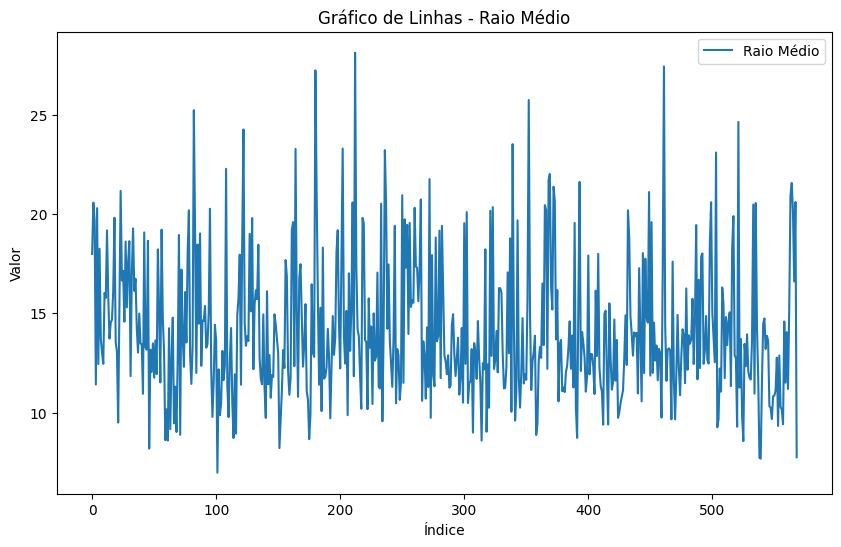

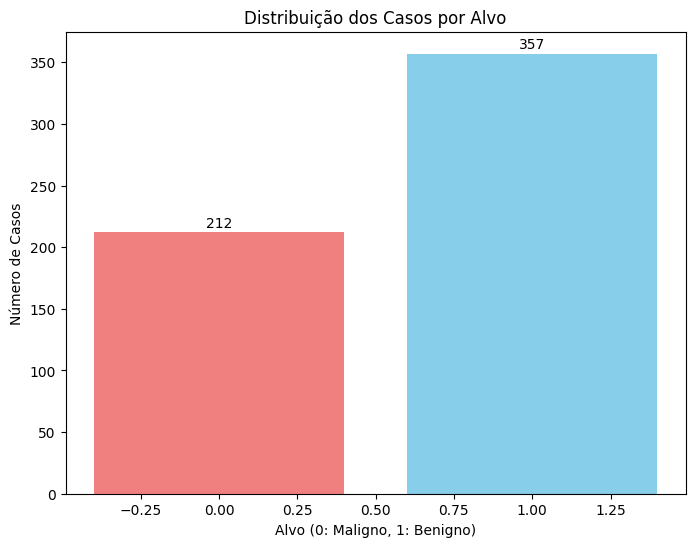

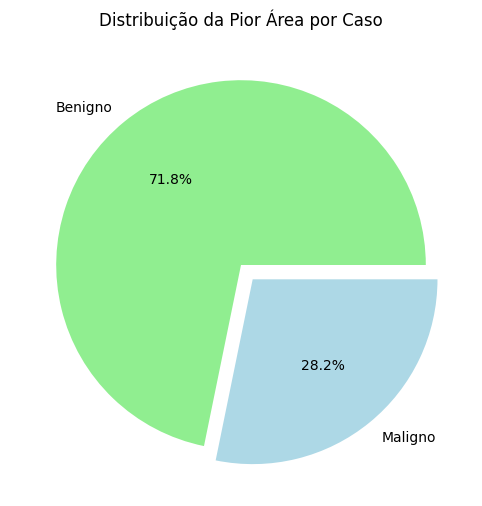

In [3]:
def plot_graphs(df):
  # --- Gráfico de Linhas ---
  plt.figure(figsize=(10, 6))
  plt.plot(df['raio médio'], label='Raio Médio') # Example line plot
  plt.xlabel('Índice')
  plt.ylabel('Valor')
  plt.title('Gráfico de Linhas - Raio Médio')
  plt.legend()
  plt.show()


  # --- Gráfico de Barras (Melhorado) ---
  contagem = df['alvo'].value_counts()
  plt.figure(figsize=(8, 6))
  barras = plt.bar(contagem.index, contagem.values, color=['skyblue', 'lightcoral']) #improved colors
  plt.xlabel('Alvo (0: Maligno, 1: Benigno)')
  plt.ylabel('Número de Casos')
  plt.title('Distribuição dos Casos por Alvo')
  for bar in barras:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom') # Adjusted text position
  plt.show()


  # --- Gráfico de Pizza (Melhorado) ---
  grupo = df.groupby('alvo')['pior área'].mean() # Use mean instead of sum for better visualization
  plt.figure(figsize=(8, 6))
  plt.pie(grupo.values, labels=['Benigno', 'Maligno'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue'], explode=[0, 0.1]) # Explode Maligno slice
  plt.title('Distribuição da Pior Área por Caso')
  plt.show()

# Chamar função
plot_graphs(df)

## Ajustes na base
* Reduzir a base de dados para 10 melhores features;
* Salvar está base reduzida

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
# Separar as Features da label
X = df.drop('alvo', axis=1)
y = df['alvo']


# Selecionar as 10 melhores features
selecionar = SelectKBest(score_func=f_classif, k=10)
X_new = selecionar.fit_transform(X, y)
indices = selecionar.get_support(indices=True)
selected_features = list(X.columns[indices])
df_reduced = pd.DataFrame(X_new, columns=selected_features)
df_reduced['alvo'] = y
# df_reduced.head(2)


# Salvar a base de dados com as 10 melhores features
df_reduced.to_csv('df_reduced.csv', index=False)